In [235]:
import numpy as np
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt

lena = 'lena512color.tiff'

img = imread(lena)

(512, 512, 3)


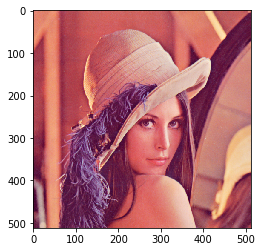

In [236]:
# RGB img
print img.shape
plt.imshow(img)
plt.show()

In [282]:
# RGB -> YUV

def RGB2YUV(rgb_img):
    mat = np.array([[ 0.29900, -0.16874,  0.50000],
                 [0.58700, -0.33126, -0.41869],
                 [ 0.11400, 0.50000, -0.08131]])
    yuv_img = rgb_img.dot(mat)
    yuv_img += np.array([[[0, 128.0, 128.0]]])
    
    return yuv_img


# YUV -> RGB

def YUV2RGB(yuv_img):
    mat = np.array([[1.0, 1.0, 1.0],
                 [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
                 [1.4019975662231445, -0.7141380310058594 , 0.00001542569043522235]])
    
    rgb_img = yuv_img.dot(mat)
    rgb_img += np.array([[[-179.455, 135.459, -226.818]]])
 
    return rgb_img

yuv_img = RGB2YUV(img)

rgb_img = YUV2RGB(yuv_img)

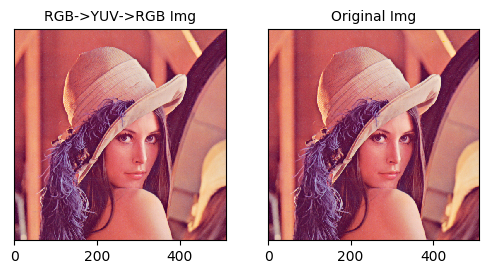

In [283]:
# Test for RGB2YUV and YUV2RGB

figure, ax = plt.subplots(1, 2, dpi=100)
ax[0].imshow(np.cast[np.uint8](np.around(rgb_img)))
ax[0].set_title("RGB->YUV->RGB Img", fontsize=10)
ax[0].set_yticks([])
ax[1].imshow(img)
ax[1].set_title("Original Img", fontsize=10)
ax[1].set_yticks([])
figure.subplots_adjust(hspace=1)
plt.show()

In [239]:
# Quantify Matrix
Y_round_matrix = np.array(
    [
        [16,11,10,16,24,40,51,61],
        [12,12,14,19,26,58,60,55],
        [14,13,16,24,40,57,69,56],
        [14,17,22,29,51,87,80,62],
        [18,22,37,56,68,109,103,77],
        [24,35,55,64,81,104,113,92],
        [49,64,78,87,103,121,120,101],
        [72,92,95,98,112,100,103,99]
    ]
)

UV_round_matrix = np.array([
    [17,18,24,47,99,99,99,99],
    [18,21,26,66,99,99,99,99],
    [24,26,56,99,99,99,99,99],
    [47,66,99,99,99,99,99,99],
    [99,99,99,99,99,99,99,99],
    [99,99,99,99,99,99,99,99],
    [99,99,99,99,99,99,99,99],
    [99,99,99,99,99,99,99,99]
])

In [240]:
# DCT (8 x 8 block)

def _DCT(N):
    def inner(img):
        dct_img = np.zeros(img.shape)
        A = np.zeros((N, N))
        co1 = 1 / np.sqrt(N)
        co2 = 1.41421 / np.sqrt(N)
        for i in range(N):
            for j in range(N):
                co = co1 if i == 0 else co2
                A[i, j] = co * np.cos((2*j+1)*np.pi*i/(2*N)) 
                    
        for i in range(0, img.shape[0]/N):
            for j in range(0, img.shape[1]/N):
                for k in range(3):
                    tmp = A.dot(img[i*N:(i+1)*N, j*N:(j+1)*N, k]).dot(A.T) / (Y_round_matrix if k == 0 else UV_round_matrix)
                    dct_img[i*N:(i+1)*N, j*N:(j+1)*N, k] = np.around(tmp)
                    
        return dct_img
    return inner

DCT = _DCT(8)

dct_yuv_img = DCT(yuv_img)

In [285]:
# Inverse DCT

def _iDCT(N):
    def inner(img):
        idct_img = np.zeros(img.shape)
        A = np.zeros((N, N))
        co1 = 1 / np.sqrt(N)
        co2 = 1.41421 / np.sqrt(N)
        for i in range(N):
            for j in range(N):
                co = co1 if i == 0 else co2
                A[i, j] = co * np.cos((2*j+1)*np.pi*i/(2*N)) 
                    
        for i in range(0, img.shape[0]/N):
            for j in range(0, img.shape[1]/N):
                for k in range(3):
                    tmp = img[i*N:(i+1)*N, j*N:(j+1)*N, k] * (Y_round_matrix if k == 0 else UV_round_matrix)
                    idct_img[i*N:(i+1)*N, j*N:(j+1)*N, k] = A.T.dot(tmp).dot(A) 
        return idct_img
    return inner

iDCT = _iDCT(8)

re_yuv_img = iDCT(dct_yuv_img)

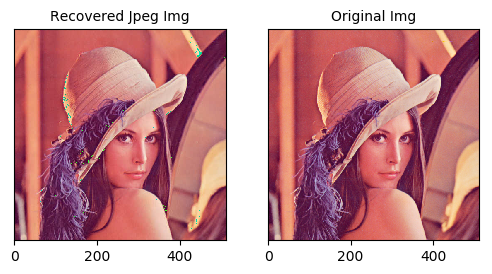

In [288]:
# Test for Recovered Jpeg
re_rgb_img = YUV2RGB(re_yuv_img)
figure, ax = plt.subplots(1, 2, dpi=100)
ax[0].imshow(np.cast[np.uint8](np.around(re_rgb_img)))
ax[0].set_title("Recovered Jpeg Img", fontsize=10)
ax[0].set_yticks([])
ax[1].imshow(img)
ax[1].set_title("Original Img", fontsize=10)
ax[1].set_yticks([])
figure.subplots_adjust(hspace=1)
plt.show()

In [289]:
# Partial Jpeg Compression
def partial_Jpeg(img):
    yuv_img = RGB2YUV(img)
    DCT = _DCT(8)
    dct_yuv_img = DCT(yuv_img)
    return dct_yuv_img

partial_jpeg_img = partial_Jpeg(img)

In [290]:
# Zigzag Conversion
def zigzag(mat):
    n = len(mat)
    for i in range(2*n-1):
        for j in range(n):
            pass

mat = np.array(
    [
        [1, 2, 6],
        [3, 5, 7],
        [4, 8, 9]
    ])
print zigzag(mat)

None
